# Linear Regression - Scikit-learn Implementation

/var/folders/xz/j44c8bq91pz_q42mkrzk9z1m0000gn/T/ipykernel_51989/1818105646.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("../housing.csv", delim_whitespace=True, header=None)


Dataset shape: (506, 14)

Basic statistics:
               0           1           2           3           4           5   \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

               6           7           8           9           10          11  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.45553

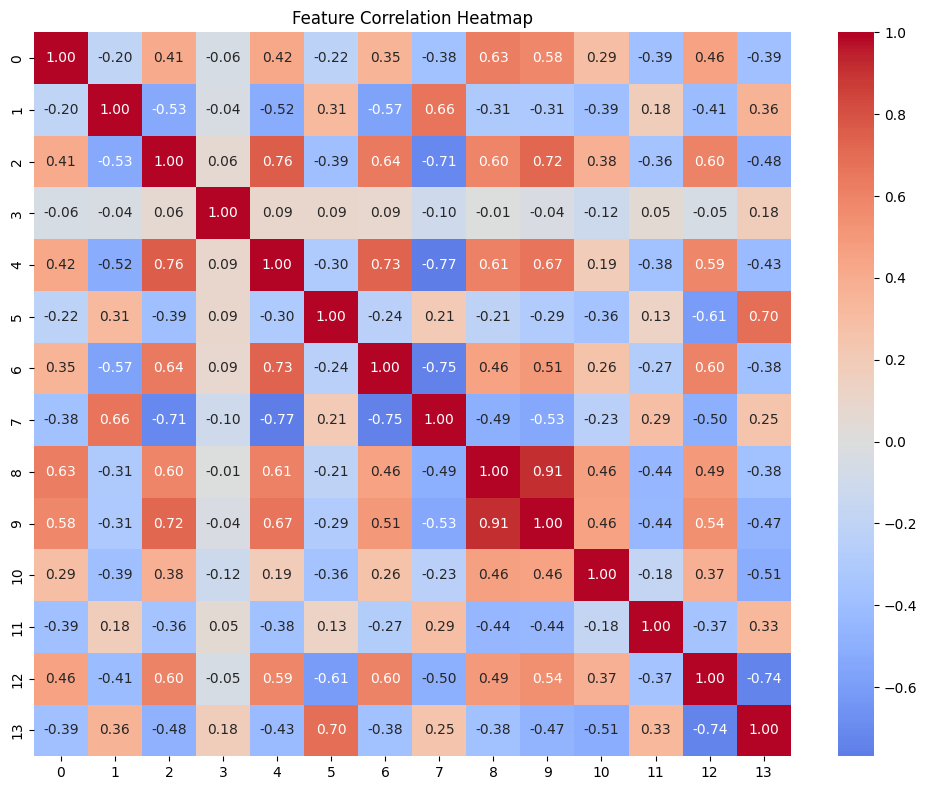

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("../housing.csv", delim_whitespace=True, header=None)

print(f"Dataset shape: {df.shape}")
print(f"\nBasic statistics:")
print(df.describe())
print(f"\nMissing values: {df.isnull().sum().sum()}")
print(f"\nTarget (last column) - Mean: {df.iloc[:, -1].mean():.2f}, Std: {df.iloc[:, -1].std():.2f}")

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.savefig('images/linear_regression_sklearn_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

X = df.iloc[:, :-1].to_numpy(dtype=float)
y = df.iloc[:, -1].to_numpy(dtype=float)
m, n = X.shape

In [2]:
rng = np.random.default_rng(42)
perm = rng.permutation(m)

m_train = int(0.80 * m)
m_val = int(0.10 * m)
m_test = m - m_train - m_val

idx_train = perm[:m_train]
idx_val = perm[m_train:m_train+m_val]
idx_test = perm[m_train+m_val:]

X_train, y_train = X[idx_train], y[idx_train]
X_val, y_val = X[idx_val], y[idx_val]
X_test, y_test = X[idx_test], y[idx_test]

print(f"Train: {m_train}, Val: {m_val}, Test: {m_test}")

Train: 404, Val: 50, Test: 52


In [3]:
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_pred_all = model.predict(X)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")
print(f"R²: {r2:.4f}")

Train MSE: 22.80
Test MSE: 14.32
R²: 0.8175


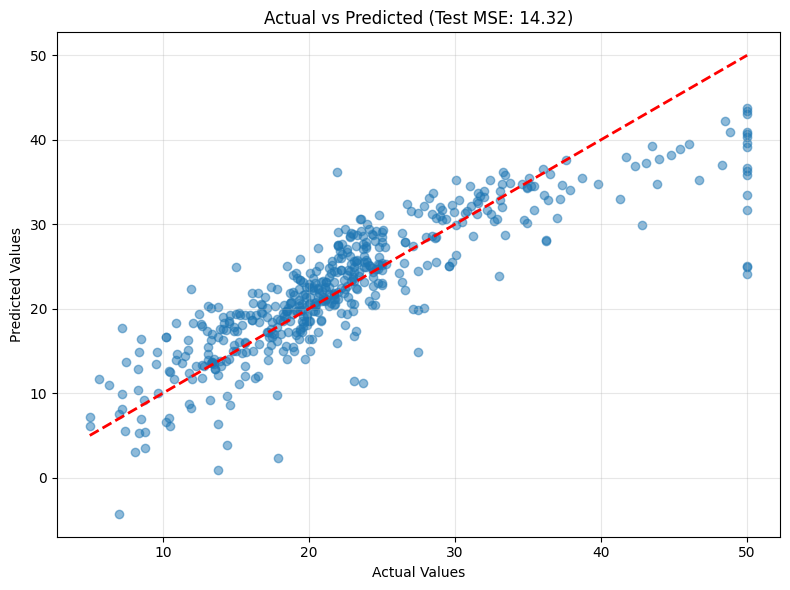

In [4]:
plt.figure(figsize=(8, 6))

plt.scatter(y, y_pred_all, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted (Test MSE: {test_mse:.2f})')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('images/linear_regression_sklearn_results.png', dpi=150, bbox_inches='tight')
plt.show()
